In [1]:
from sklearn.datasets import load_wine
import pandas as pd


In [2]:
data = load_wine()

In [3]:
df = pd.DataFrame(index = data.target,data = data.data,columns = data.feature_names)

In [4]:
print(df)

    alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0     14.23        1.71  2.43               15.6      127.0           2.80   
0     13.20        1.78  2.14               11.2      100.0           2.65   
0     13.16        2.36  2.67               18.6      101.0           2.80   
0     14.37        1.95  2.50               16.8      113.0           3.85   
0     13.24        2.59  2.87               21.0      118.0           2.80   
..      ...         ...   ...                ...        ...            ...   
2     13.71        5.65  2.45               20.5       95.0           1.68   
2     13.40        3.91  2.48               23.0      102.0           1.80   
2     13.27        4.28  2.26               20.0      120.0           1.59   
2     13.17        2.59  2.37               20.0      120.0           1.65   
2     14.13        4.10  2.74               24.5       96.0           2.05   

    flavanoids  nonflavanoid_phenols  proanthocyanins  color_in

In [5]:
from pca import pca


In [6]:
model = pca(normalize=True,detect_outliers=['ht2','spe'],n_std=2)
results = model.fit_transform(df)

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [13] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [10] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [13] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[10]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [7]:
print(results['outliers'])

     y_proba     p_raw    y_score  y_bool  y_bool_spe  y_score_spe
0   0.982875  0.376726  21.351215   False       False     3.617239
0   0.982875  0.624371  17.438087   False       False     2.234477
0   0.982875  0.589438  17.969195   False       False     2.719789
0   0.982875  0.134454  27.028857   False        True     4.659735
0   0.982875  0.883264  12.861094   False       False     1.332104
..       ...       ...        ...     ...         ...          ...
2   0.982875  0.147396  26.583414   False        True     4.033903
2   0.982875  0.771408  15.087004   False       False     3.139750
2   0.982875  0.244157  23.959708   False        True     3.846217
2   0.982875  0.333600  22.128104   False       False     3.312952
2   0.982875  0.138437  26.888278   False        True     4.238283

[178 rows x 6 columns]


[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 1500x1000 with 1 Axes>,
 <AxesSubplot:title={'center':'Outliers marked using Hotellingt2 method'}, xlabel='PC1 (36.1% expl.var)', ylabel='PC2 (19.2% expl.var)'>)

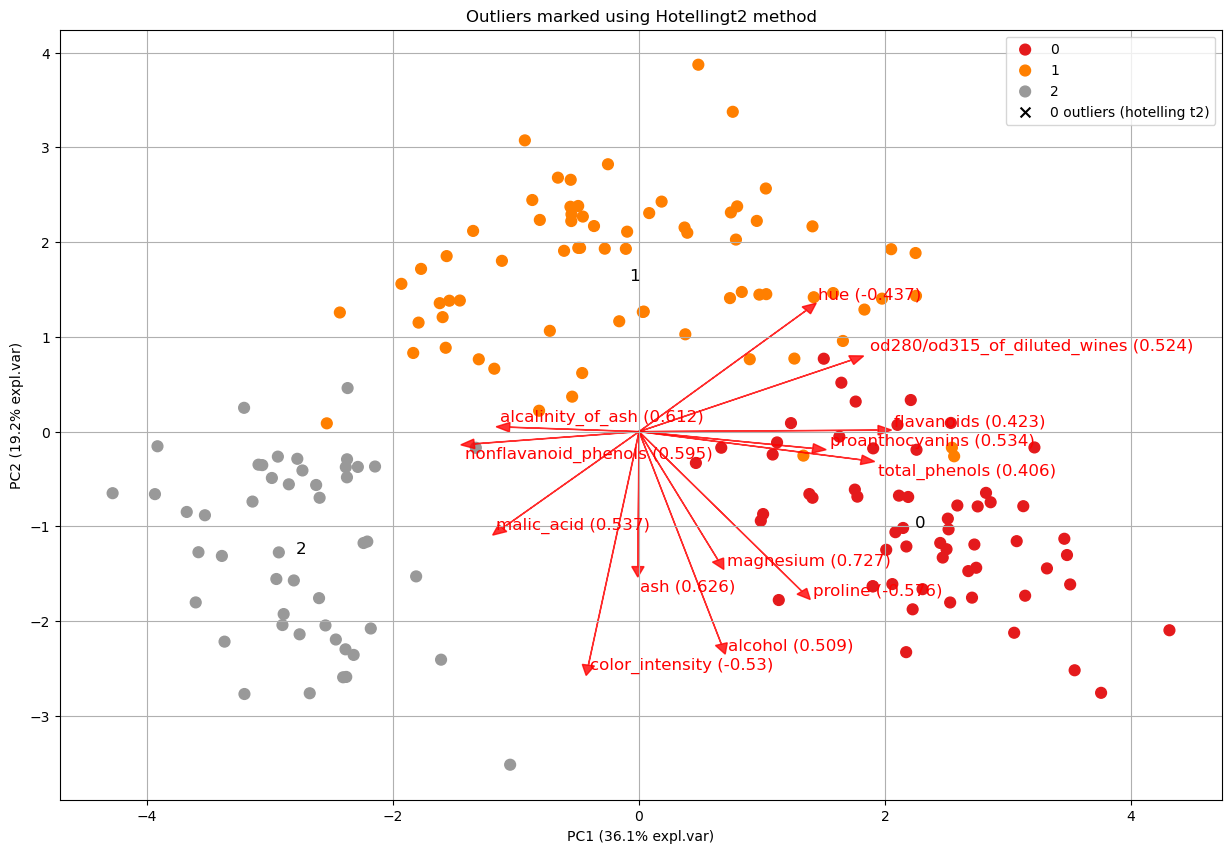

In [9]:
model.biplot(SPE=False,hotellingt2=True,title='Outliers marked using Hotellingt2 method')

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


(<Figure size 1500x1000 with 2 Axes>,
 <Axes3D:title={'center':'Outliers marked using Hotellingt2 method'}, xlabel='PC1 (36.1% expl.var)', ylabel='PC2 (19.2% expl.var)'>)

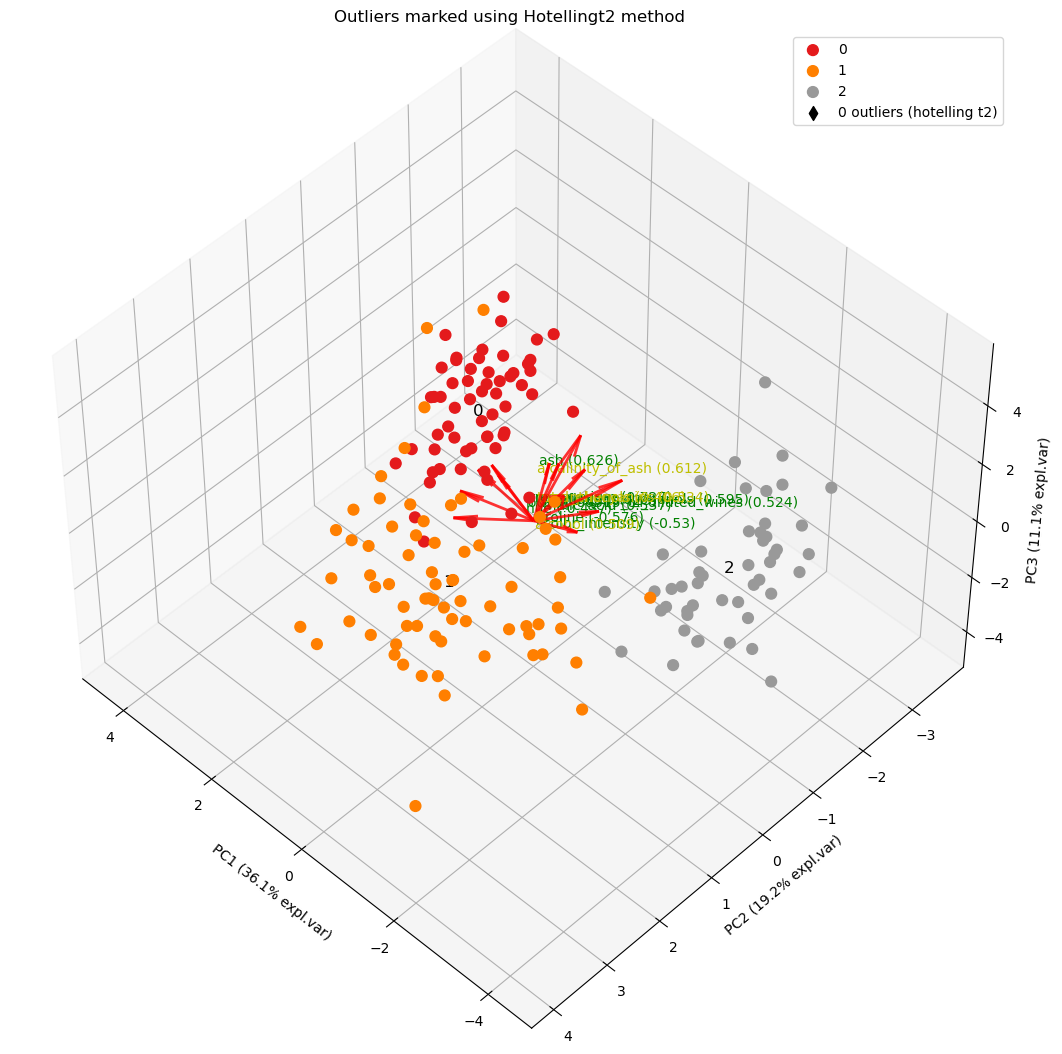

In [10]:
model.biplot3d(SPE=False,hotellingt2=True,title='Outliers marked using Hotellingt2 method')

In [11]:
df.loc[results['outliers']['y_bool'],:]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline


[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 1500x1000 with 1 Axes>,
 <AxesSubplot:title={'center':'Outliers marked using SPE Method'}, xlabel='PC1 (36.1% expl.var)', ylabel='PC2 (19.2% expl.var)'>)

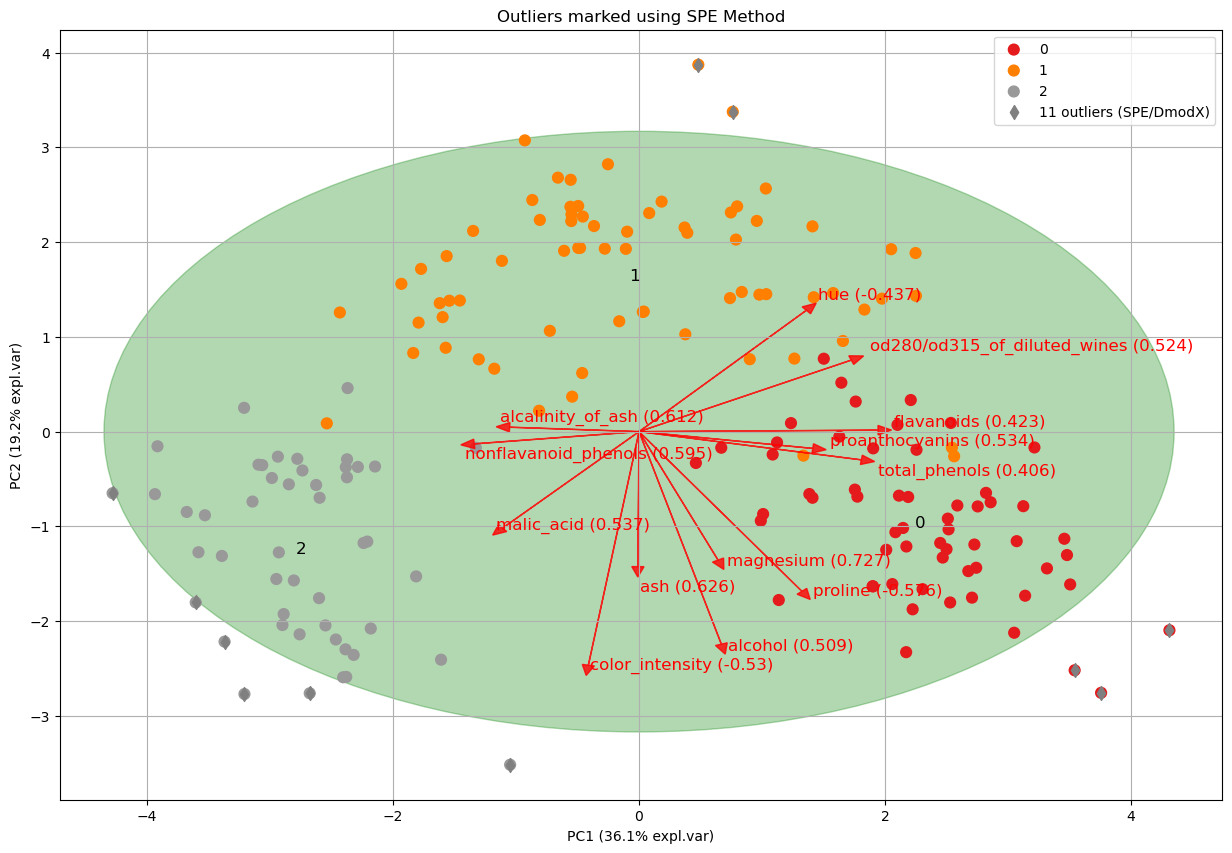

In [12]:
model.biplot(SPE=True,hotellingt2=False,title='Outliers marked using SPE Method')

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


(<Figure size 1500x1000 with 2 Axes>,
 <Axes3D:title={'center':'Outliers marked using SPE Method 3D'}, xlabel='PC1 (36.1% expl.var)', ylabel='PC2 (19.2% expl.var)'>)

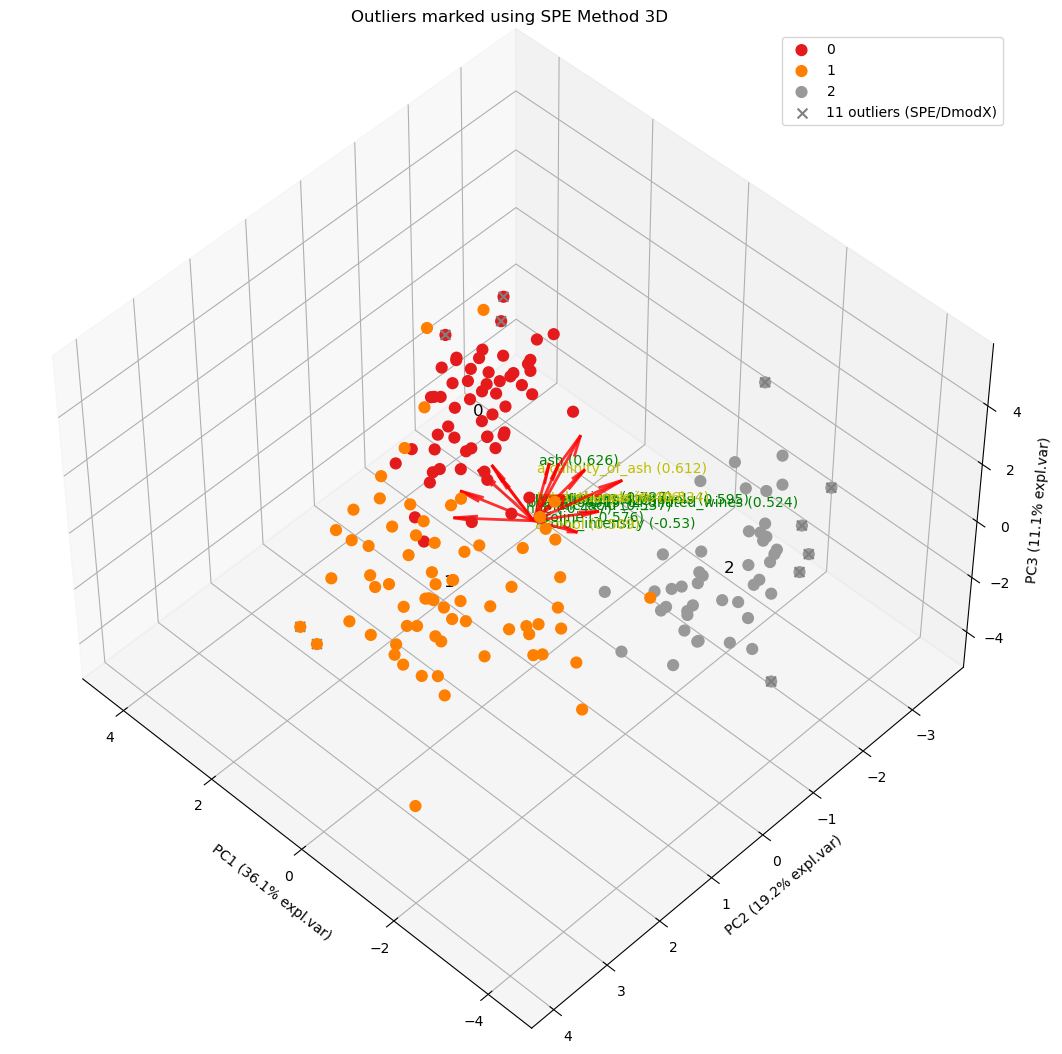

In [13]:
model.biplot3d(SPE=True,hotellingt2=False,title='Outliers marked using SPE Method 3D')

In [14]:
df.loc[results['outliers']['y_bool_spe'],:]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480.0
0,14.38,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.5,1.20,3.00,1547.0
0,14.19,1.59,2.48,16.5,108.0,3.30,3.93,0.32,1.86,8.7,1.23,2.82,1680.0
1,12.00,0.92,2.00,19.0,86.0,2.42,2.26,0.30,1.43,2.5,1.38,3.12,278.0
1,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.9,1.71,2.87,407.0
2,13.88,5.04,2.23,20.0,80.0,0.98,0.34,0.40,0.68,4.9,0.58,1.33,415.0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.9,0.60,1.48,725.0
2,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,13.0,0.57,1.96,660.0
2,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0
2,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0


In [16]:
import numpy as np
I_overlap = np.logical_and(results['outliers']['y_bool'],results['outliers']['y_bool_spe'])
df.loc[I_overlap,:]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline


In [17]:
from pca import pca


In [18]:
model = pca()

In [19]:
df = model.import_example(data='student')

[pca] >Downloading example dataset from github source..
[pca] >Import dataset [student]


In [20]:
print(df)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freetime  goout  Dalc  Walc health 

In [21]:
from df2onehot import df2onehot


In [22]:
df_hot = df2onehot(df)['onehot']


[df2onehot] >Auto detecting dtypes.


100%|██████████| 33/33 [00:00<00:00, 191.95it/s]

[df2onehot] >Set dtypes in dataframe..



100%|██████████| 33/33 [00:00<00:00, 141.18it/s]

[df2onehot] >Total onehot features: 177


In [24]:
print(df_hot)

     school_GP  school_MS  sex_F  sex_M  age_15.0  age_16.0  age_17.0  \
0         True      False   True  False     False     False     False   
1         True      False   True  False     False     False      True   
2         True      False   True  False      True     False     False   
3         True      False   True  False      True     False     False   
4         True      False   True  False     False      True     False   
..         ...        ...    ...    ...       ...       ...       ...   
644      False       True   True  False     False     False     False   
645      False       True   True  False     False     False     False   
646      False       True   True  False     False     False     False   
647      False       True  False   True     False     False      True   
648      False       True  False   True     False     False     False   

     age_18.0  age_19.0  age_20.0  ...  G3_15.0  G3_16.0  G3_17.0  G3_18.0  \
0        True     False     False  ...    Fal

In [25]:
model = pca(normalize=True,detect_outliers=['ht2','spe'],alpha=0.05,n_std=3,multipletests='fdr_bh')

In [26]:
results = model.fit_transform(df_hot)

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [177] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [116] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [177] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[116]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [27]:
overlapping_outliers = np.logical_and(results['outliers']['y_bool'],results['outliers']['y_bool_spe'])

In [28]:
df.loc[overlapping_outliers]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
279,GP,M,22,U,GT3,T,3,1,services,services,...,5,4,5,5,5,1,12,7,8,5
284,GP,M,18,U,GT3,T,2,1,services,services,...,3,2,5,2,5,5,4,7,8,6
523,MS,M,18,U,LE3,T,4,4,at_home,health,...,5,5,5,5,5,5,2,5,6,6
605,MS,F,19,U,GT3,T,1,1,at_home,services,...,5,5,5,2,3,2,0,5,0,0
610,MS,F,19,R,GT3,A,1,1,at_home,at_home,...,3,5,4,1,4,1,0,8,0,0


[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2000x1200 with 1 Axes>,
 <AxesSubplot:title={'center':'Student performance'}, xlabel='PC1 (3.94% expl.var)', ylabel='PC2 (2.47% expl.var)'>)

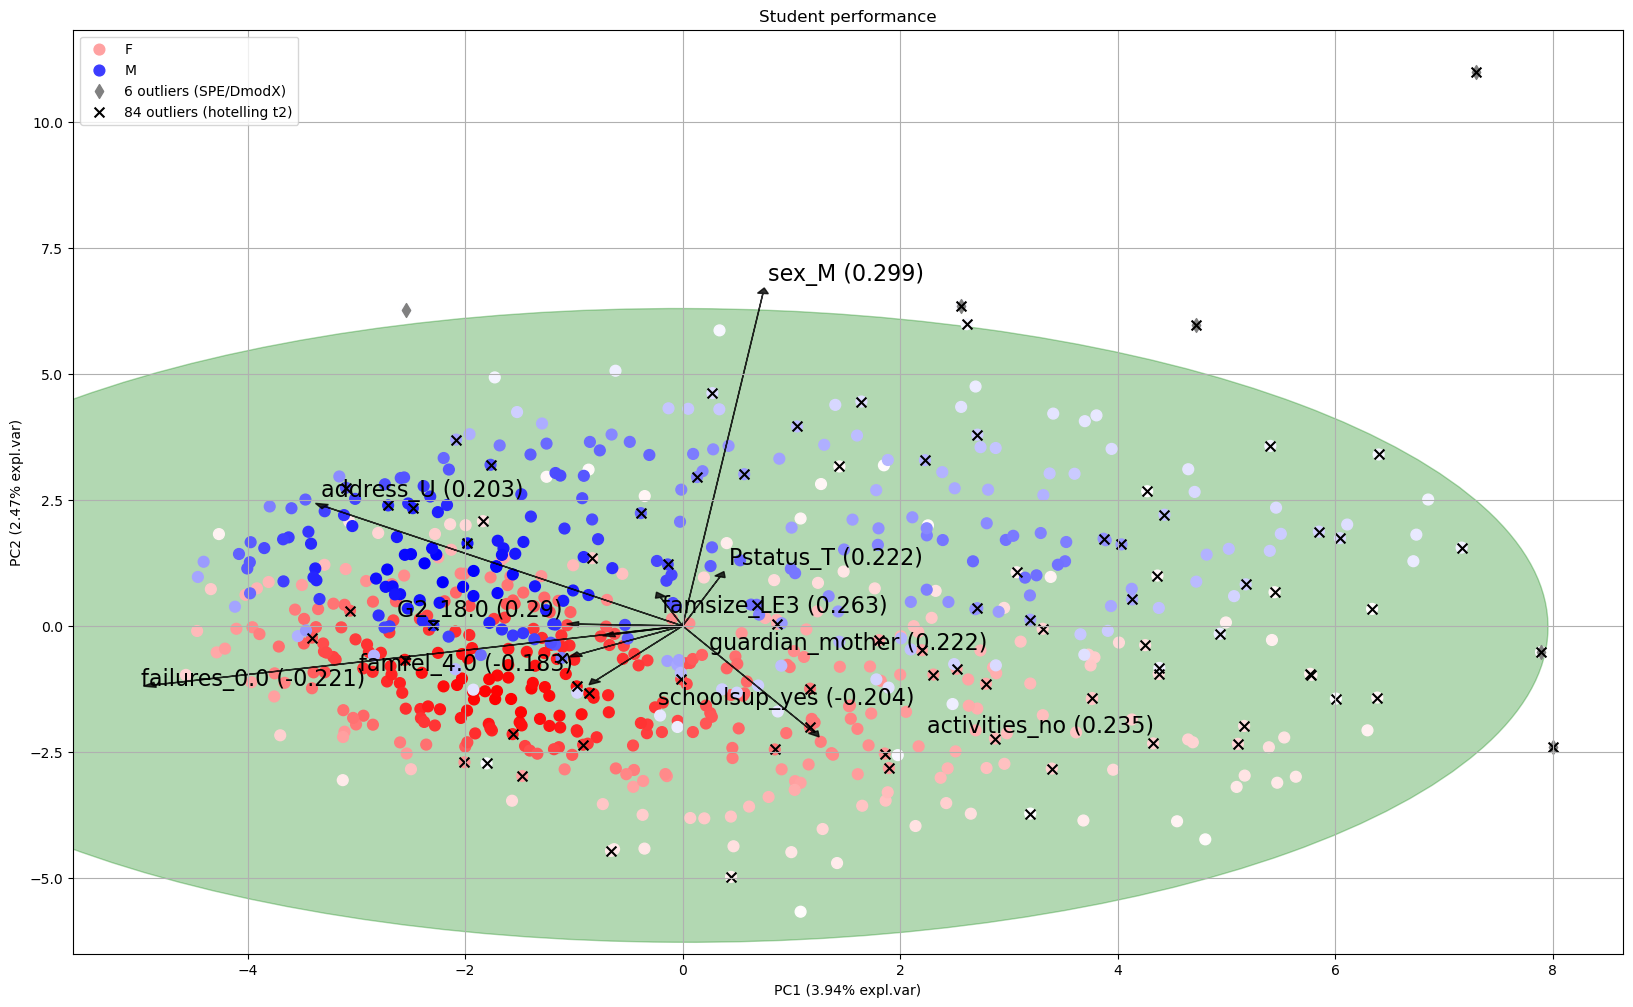

In [29]:
model.biplot(SPE=True,hotellingt2=True,jitter=0.1,n_feat=10,legend=True,label=False,y=df['sex'],title='Student performance',figsize=(20,12),color_arrow='k',fontdict={'size':16,'c':'k'},cmap='bwr_r',gradient='#FFFFFF',)